# Assignment: Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

In [110]:
import warnings
warnings.filterwarnings('ignore')


In [111]:
# Importing libraries necessary for the study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Reading Data

In [112]:
house = pd.read_csv('train.csv')
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

## Data Understanding

In [113]:
house.shape

(1460, 81)

In [114]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [115]:
house.describe([0.25,0.5,0.75,0.9,0.95,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

## Data Cleaning

In [116]:
#Checking for null values

round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [117]:
#lets first drop columns with more than 80% null values

house = house.drop(house.loc[:, list(round(100*(house.isnull().sum()/len(house.index)), 2)>80)].columns,1)

In [118]:
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending = False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2 

#### Now we will try to impute missing values in rest of the columns and we will start from the column with higher no of missing values.

In [119]:
#FireplaceQu- Fireplace quality

# Ex Excellent - Exceptional Masonry Fireplace
# Gd Good - Masonry Fireplace in main level
# TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
# Fa Fair - Prefabricated Fireplace in basement
# Po Poor - Ben Franklin Stove
# NA No Fireplace

house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [120]:
# lets convert the null values to No Fireplace

house['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)

In [121]:
# LotFrontage

house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [122]:
# converting nan values to 0

house['LotFrontage'].replace({np.nan:'0'},inplace=True)

house['LotFrontage']= house['LotFrontage'].values.astype(np.int64)

In [123]:
# GarageYrBlt is similar to YearBuilt , so dropping the column won't affect the data

house = house.drop(['GarageYrBlt'],axis=1)

In [124]:
# GarageType - Garage location

#2Types More than one type of garage
# Attchd Attached to home
# Basment Basement Garage
# BuiltIn Built-In (Garage part of house - typically has room above garage)
# CarPort Car Port
# Detchd Detached from home
# NA No Garage

house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [125]:
# Replacing null values to No Garage

house['GarageType'].replace({np.nan:'No Garage'},inplace=True)

In [126]:
# GarageFinish - Interior finish of the garage

# Fin Finished
# RFn Rough Finished
# Unf Unfinished
# NA No Garage

house['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [127]:
# Replacing null values to No Garage

house['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)

In [128]:
# GarageQual - Garage quality

# Ex Excellent
# Gd Good
# TA Typical/Average
# Fa Fair
# Po Poor
# NA No Garage

house['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [129]:
# Replacing null values to No Garage

house['GarageQual'].replace({np.nan:'No Garage'},inplace=True)

In [130]:
# GarageCond - Garage condition
# Ex Excellent
# Gd Good
# TA Typical/Average
# Fa Fair
# Po Poor
# NA No Garage

house['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [131]:
# Replacing null values to No Garage

house['GarageCond'].replace({np.nan:'No Garage'},inplace=True)

In [132]:
# BsmtExposure-  Refers to walkout or garden level walls

# Gd Good Exposure
# Av Average Exposure (split levels or foyers typically score average or above)
# Mn Mimimum Exposure
# No No Exposure
# NA No Basement

house['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [133]:
# Replacing null values to No Basement

house['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)

In [134]:
# BsmtFinType2 - Rating of basement finished area (if multiple types)

# GLQ Good Living Quarters
# ALQ Average Living Quarters
# BLQ Below Average Living Quarters
# Rec Average Rec Room
# LwQ Low Quality
# Unf Unfinshed
# NA No Basement

house['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [135]:
# Replacing null values to No Basement

house['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)

In [136]:
# BsmtFinType1 -  Rating of basement finished area

# GLQ Good Living Quarters
# ALQ Average Living Quarters
# BLQ Below Average Living Quarters
# Rec Average Rec Room
# LwQ Low Quality
# Unf Unfinshed
# NA No Basement

house['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [137]:
# Replacing null values to No Basement

house['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)

In [138]:
# BsmtCond - Evaluates the general condition of the basement
# Ex Excellent
# Gd Good
# TA Typical - slight dampness allowed
# Fa Fair - dampness or some cracking or settling
# Po Poor - Severe cracking, settling, or wetness
# NA No Basement

house['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [139]:
# Replacing null values to No Basement

house['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)

In [140]:
house['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

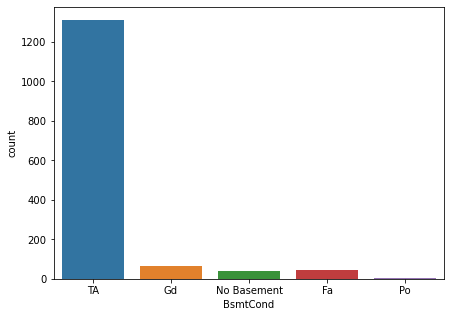

In [141]:
plt.figure(figsize=(7,5))
sns.countplot(house['BsmtCond'])

From the above graph we can see that 98% of the basement are in ok condition so there is not much variance .Dropping the column won't affect our data.

In [142]:
house = house.drop(['BsmtCond'],axis=1)

In [143]:
# BsmtQual -  Evaluates the height of the basement
# Ex Excellent (100+ inches)
# Gd Good (90-99 inches)
# TA Typical (80-89 inches)
# Fa Fair (70-79 inches)
# Po Poor (<70 inches
# NA No Basement

house['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [144]:
# Replacing null values to No Basement

house['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)

In [145]:
# MasVnrType - Masonry veneer type
# BrkCmn Brick Common
# BrkFace Brick Face
# CBlock Cinder Block
# None None
# Stone Stone

house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [146]:
house['MasVnrType'].fillna('None', inplace=True)

In [147]:
# MasVnrArea - Masonry veneer area in square feet

house['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

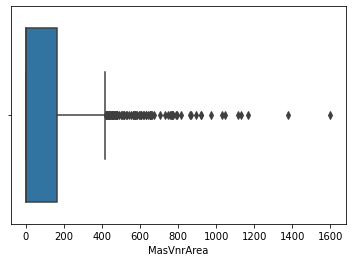

In [148]:
sns.boxplot(house['MasVnrArea'])
plt.show()

In [149]:
# We can clearltThis column has outliers. So imputing the missing values with median score will be a good choice

house.MasVnrArea.fillna(house.MasVnrArea.median(),inplace=True)

In [150]:
# Electrical - Electrical system
# SBrkr Standard Circuit Breakers & Romex
#FuseA Fuse Box over 60 AMP and all Romex wiring (Average)
#FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
#FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
#Mix Mixed

house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

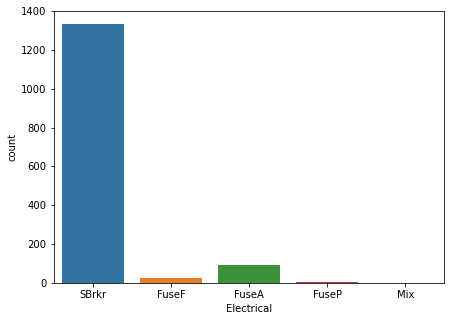

In [151]:
plt.figure(figsize=(7,5))
sns.countplot(house['Electrical'])

In [152]:
# convert the null values to unknown
house['Electrical'].replace({np.nan:'Unknown'},inplace=True)

In [153]:
#Final check for missing values

round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending = False)

SalePrice        0.0
YearBuilt        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
OverallCond      0.0
TotalBsmtSF      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
BsmtUnfSF        0.0
Heating          0.0
SaleCondition    0.0
GarageType       0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch

In [154]:
# To get how old is the house we are going to subtract YearBuilt from YrSold


house['Age'] = house['YrSold'] - house['YearBuilt']

In [155]:
house['Renovation_age'] = house['YrSold'] - house['YearRemodAdd']

In [156]:
house = house.drop(['YearBuilt','YrSold','YearRemodAdd'],axis=1)

In [157]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,Renovation_age
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,5,5
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,31,31
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,7,6
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,91,36
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,8,8


In [158]:
# MSSubClass: Identifies the type of dwelling involved in the sale.

# 20 1-STORY 1946 & NEWER ALL STYLES
# 30 1-STORY 1945 & OLDER
# 40 1-STORY W/FINISHED ATTIC ALL AGES
# 45 1-1/2 STORY - UNFINISHED ALL AGES
# 50 1-1/2 STORY FINISHED ALL AGES
# 60 2-STORY 1946 & NEWER
# 70 2-STORY 1945 & OLDER
# 75 2-1/2 STORY ALL AGES
# 80 SPLIT OR MULTI-LEVEL
# 85 SPLIT FOYER
# 90 DUPLEX - ALL STYLES AND AGES
# 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
# 150 1-1/2 STORY PUD - ALL AGES
# 160 2-STORY PUD - 1946 & NEWER
# 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
# 190 2 FAMILY CONVERSION - ALL STYLES AND AGES


house['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [159]:
# Converting MSSubClass to categorical

house['MSSubClass'] = house['MSSubClass'].astype('object')

In [160]:
house['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

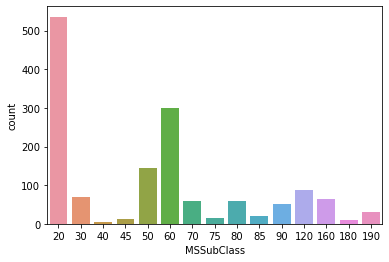

In [161]:
sns.countplot(house['MSSubClass'])
plt.show()

In [162]:
# MoSold
house['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [163]:
# Converting MoSold to categorical

house['MoSold'] = house['MoSold'].astype('object')

## Outliers Treatment

In [164]:
house_num = house.select_dtypes(include=['float64', 'int64'])
house_num.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Renovation_age
0,1,65,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,5
1,2,80,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,31
2,3,68,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,6
3,4,60,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,91,36
4,5,84,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,8


In [165]:
house_num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'Age', 'Renovation_age'],
      dtype='object')

In [166]:
house_num.describe([0.1,0.5,0.9,0.95,0.99])

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Renovation_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,57.623288,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945,22.950000
std,421.610009,34.664304,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152,20.640653
min,1.000000,0.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000
10%,146.900000,0.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106475.000000,1.000000,1.000000
50%,730.500000,63.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,14.000000
90%,1314.100000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,84.000000,56.000000
95%,1387.050000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,91.000000,58.000000
99%,1445.410000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,110.410000,60.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000,60.000000


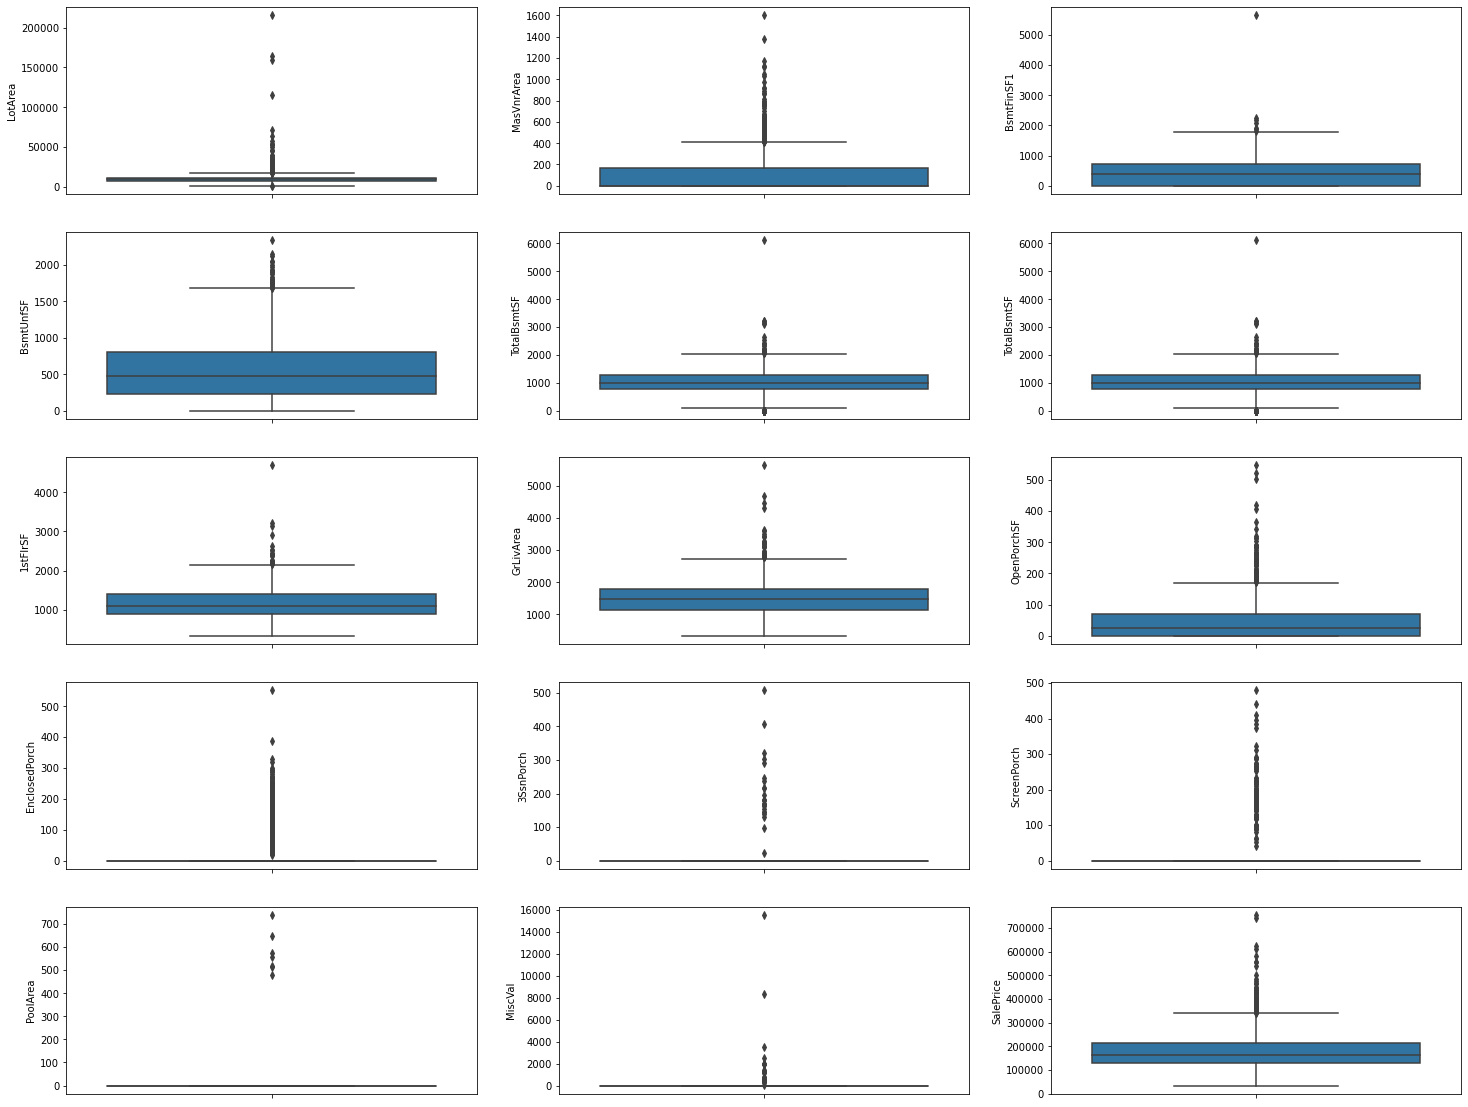

In [167]:
# plotting the columns to check if they contain outliers 

plt.figure(figsize=(25, 20))

plt.subplot(5,3,1)
sns.boxplot(house_num['LotArea'],orient='v')

plt.subplot(5,3,2)
sns.boxplot(house_num['MasVnrArea'],orient='v')

plt.subplot(5,3,3)
sns.boxplot(house_num['BsmtFinSF1'],orient='v')

plt.subplot(5,3,4)
sns.boxplot(house_num['BsmtUnfSF'],orient='v')

plt.subplot(5,3,5)
sns.boxplot(house_num['TotalBsmtSF'],orient='v')

plt.subplot(5,3,6)
sns.boxplot(house_num['TotalBsmtSF'],orient='v')

plt.subplot(5,3,7)
sns.boxplot(house_num['1stFlrSF'],orient='v')

plt.subplot(5,3,8)
sns.boxplot(house_num['GrLivArea'],orient='v')

plt.subplot(5,3,9)
sns.boxplot(house_num['OpenPorchSF'],orient='v')

plt.subplot(5,3,10)
sns.boxplot(house_num['EnclosedPorch'],orient='v')

plt.subplot(5,3,11)
sns.boxplot(house_num['3SsnPorch'],orient='v')

plt.subplot(5,3,12)
sns.boxplot(house_num['ScreenPorch'],orient='v')

plt.subplot(5,3,13)
sns.boxplot(house_num['PoolArea'],orient='v')

plt.subplot(5,3,14)
sns.boxplot(house_num['MiscVal'],orient='v')

plt.subplot(5,3,15)
sns.boxplot(house_num['SalePrice'],orient='v')

plt.show()

From the above boxplots we can clearly see that these columns contain outliers. So the outlier treatment need to be done.

In [168]:
num_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [169]:
# In case of outliers if the value becomes very high or very low then it will affect our model
# So here we have choosen to keep the values between 0.25 and 0.99 quantile range

def dropoutliers(x):
    list= []
    for col in num_cols:
        Q1 = x[col].quantile(0.25)
        Q2 = x[col].quantile(0.99)
        IQR = Q2 - Q1
        x = x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q2+(1.5*IQR)))]
    return x


house = dropoutliers(house)

In [170]:
house.shape

(1441, 74)

In [171]:
#converting SalePrice to logarithmic scale

house['SalePrice'] = np.log(house['SalePrice'])

In [172]:
house['SalePrice'].describe()

count    1441.000000
mean       12.020796
std         0.396879
min        10.460242
25%        11.774520
50%        11.995352
75%        12.270220
max        13.534473
Name: SalePrice, dtype: float64

## EDA

In [173]:
house_num.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Renovation_age
0,1,65,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,5
1,2,80,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,31
2,3,68,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,6
3,4,60,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,91,36
4,5,84,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,8


In [174]:
house_num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'Age', 'Renovation_age'],
      dtype='object')

In [175]:
house_num = house_num.drop('Id',axis=1)
house_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Renovation_age
0,65,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,5
1,80,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,31
2,68,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,6
3,60,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,91,36
4,84,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,8


In [176]:
house_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'Age', 'Renovation_age'],
      dtype='object')

In [177]:
house_num.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Renovation_age
LotFrontage,1.000000,0.100739,0.176561,-0.053457,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.034425,0.221396,0.044018,0.165229,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.209624,-0.037327,-0.079482
LotArea,0.100739,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014832,-0.014709
OverallQual,0.176561,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.572629,-0.552570
OverallCond,-0.053457,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856,0.377325,-0.070931
MasVnrArea,0.105010,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,-0.311479,-0.177105
BsmtFinSF1,0.076670,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.248483,-0.127556
BsmtFinSF2,-0.009312,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.050422,0.069814
BsmtUnfSF,0.160829,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.150619,-0.183830
TotalBsmtSF,0.238274,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.391498,-0.292096
1stFlrSF,0.245181,0.299475,0.476224,-0.144203,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.282143,-0.241310


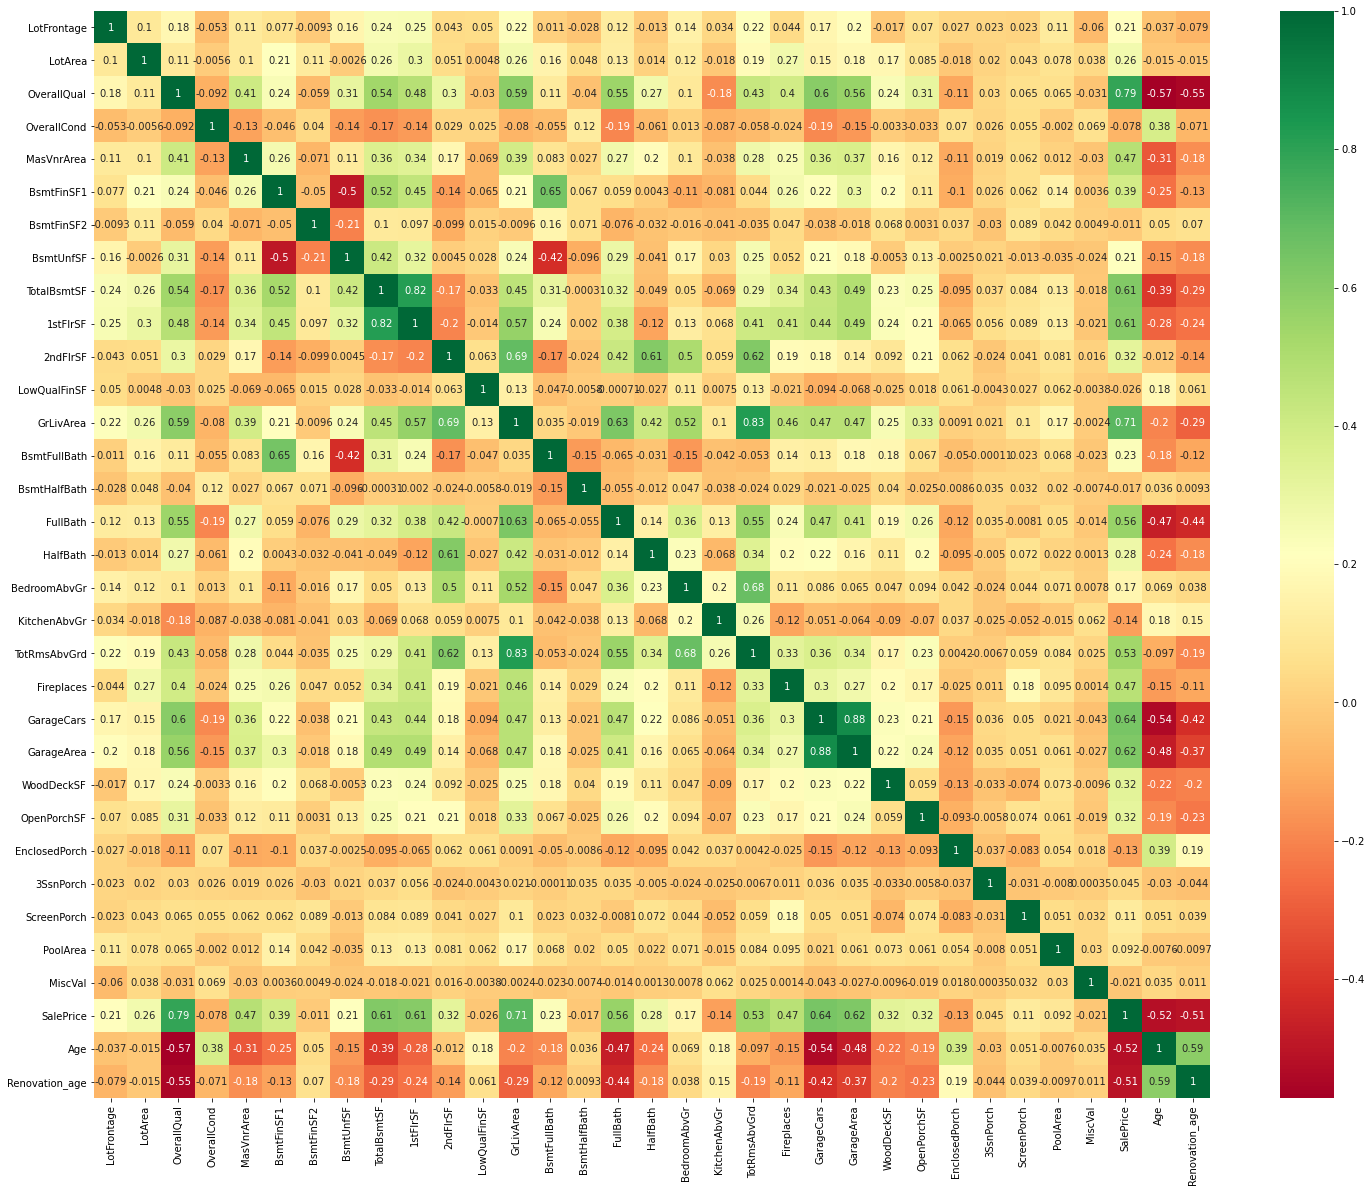

In [178]:
# Let's plot a heatmap to check correlation between Numerical variables.

plt.figure(figsize=(25,20))

sns.heatmap(house_num.corr(),annot=True, cmap= "RdYlGn")

plt.show()

 From the above heatmap we can conclude that
 
 - OverallQual , GrLivArea, GarageCars , GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, MasVnrArea are highly positively correlates to SalePrice.
 
 - Age, Renovation_age, KitchenAbvGr, EnclosedPorch are highly negatively correlated to SalePrice.

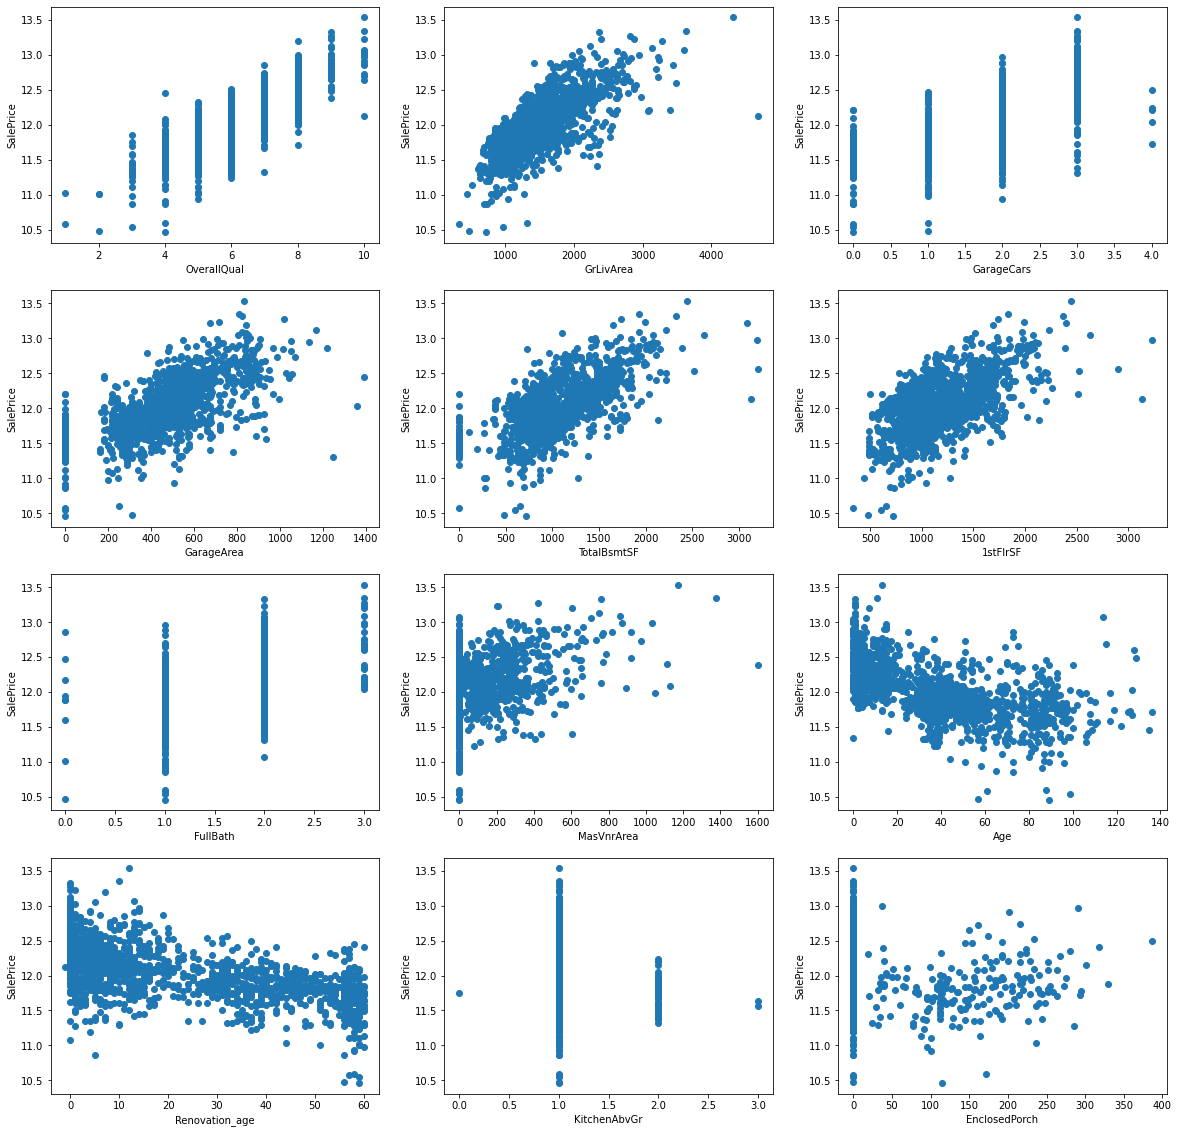

In [179]:
plt.figure(figsize = (20,20))

plt.subplot(4,3,1)
plt.scatter(x = house['OverallQual'],y = house.SalePrice)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

plt.subplot(4,3,2)
plt.scatter(house['GrLivArea'], house.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(4,3,3)
plt.scatter(house['GarageCars'], house.SalePrice)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')

plt.subplot(4,3,4)
plt.scatter(house['GarageArea'], house.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

plt.subplot(4,3,5)
plt.scatter(house['TotalBsmtSF'], house.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.subplot(4,3,6)
plt.scatter(house['1stFlrSF'], house.SalePrice)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

plt.subplot(4,3,7)
plt.scatter(house['FullBath'], house.SalePrice)
plt.xlabel('FullBath')
plt.ylabel('SalePrice')

plt.subplot(4,3,8)
plt.scatter(house['MasVnrArea'], house.SalePrice)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

plt.subplot(4,3,9)
plt.scatter(house['Age'], house.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')

plt.subplot(4,3,10)
plt.scatter(house['Renovation_age'], house.SalePrice)
plt.xlabel('Renovation_age')
plt.ylabel('SalePrice')

plt.subplot(4,3,11)
plt.scatter(house['KitchenAbvGr'], house.SalePrice)
plt.xlabel('KitchenAbvGr')
plt.ylabel('SalePrice')

plt.subplot(4,3,12)
plt.scatter(house['EnclosedPorch'], house.SalePrice)
plt.xlabel('EnclosedPorch')
plt.ylabel('SalePrice')

plt.show()

- Very Excellent houses have high Price.
- Houses above 500-2500 mtr ground level have most of the sales price.
- Houses with three car garage capacity have most of the sales price.
- Houses having garage area between 200-850 sq. feet have most of the sales price.
- Houses having basement area between 500-2500 sq. feet have most of the sales price.
- Houses with 1st floor of 500-1800 sq. feet most of the sales price.
- We can clearly see from the age saleprice graph how the sale price is decreasing from newer to older houses and also same with Renovated houses.

In [180]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Sc

In [181]:
house_obj = house[list(house.dtypes[house.dtypes == 'object'].index)]

house_obj.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,2,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,5,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,9,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,2,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,12,WD,Normal


In [182]:
house_obj.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

### plotting categorical variables with respect to SalePrice

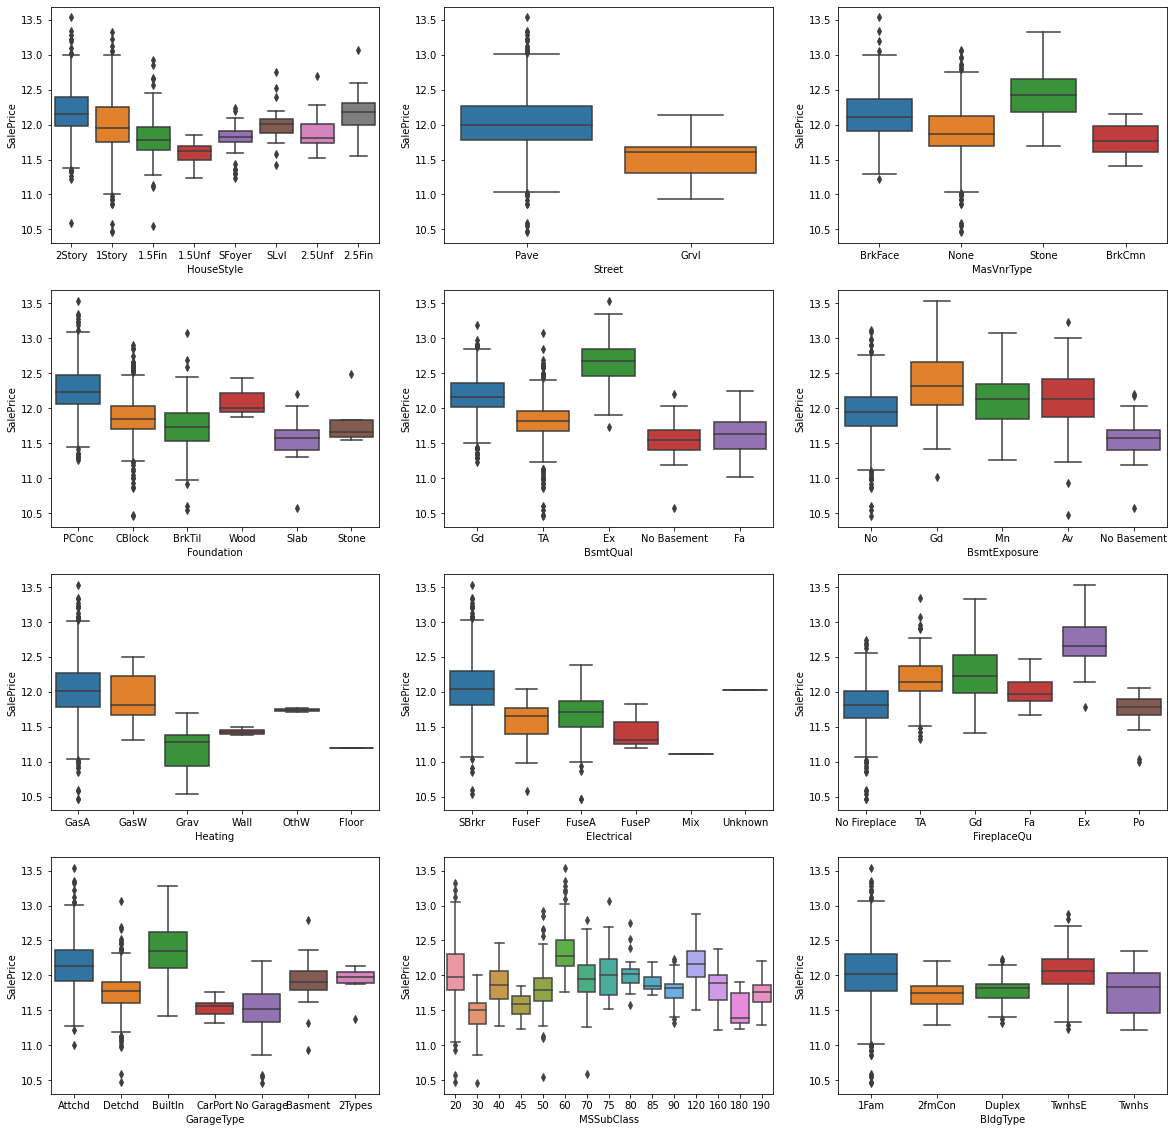

In [183]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = house)

plt.subplot(4,3,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house)

plt.subplot(4,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = house)

plt.subplot(4,3,4)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = house)

plt.subplot(4,3,5)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house)

plt.subplot(4,3,6)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house)

plt.subplot(4,3,7)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house)

plt.subplot(4,3,8)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house)

plt.subplot(4,3,9)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = house)

plt.subplot(4,3,10)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house)

plt.subplot(4,3,11)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = house)

plt.subplot(4,3,12)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house)

plt.show()

From the above graphs we can conclude that :

- Sale price of 2story and 1 story are generally higher and also more perferred by people.
- people are preferring more pave street type than Grvl type.
- Poured Concrete type foundations have high sale price and are more preffered by people .
- Basements over 100+ inches have high Sale price and are more preferred.
- Gas forced warm air furnace heating type are of high price and also preferred by more people.
- more people have opted for Standard Circuit Breakers & Romex .
- most people have opted for Excellent and good fireplace quality houses.
- Builtin and attached garage type have attracted more people.


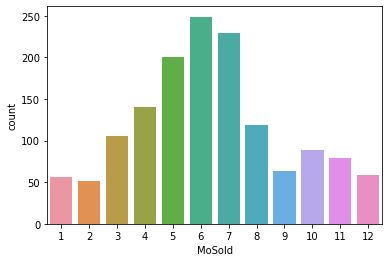

In [184]:
# Checking the sale of house per month

sns.countplot(house['MoSold'])
plt.show()

From the above graph we can clearly see that 
- June has the highest sale of houses followed by July and may.
- February, January and december have very less number of sales.

### Creating Dummies for Categorical variables

In [185]:

dummy = pd.get_dummies(house[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition']],drop_first=True)

house = pd.concat([house,dummy],axis='columns')

house = house.drop(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'SaleType', 'SaleCondition'],axis='columns')

## Train-test Split

In [186]:
# As the ID column is of no use now so dropping it would be better

house = house.drop('Id',axis=1)
house.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=263)

In [187]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(house,train_size=0.7,test_size=0.3,random_state=42)

In [188]:
df_train.shape

(1008, 263)

In [189]:
df_test.shape

(433, 263)

### Scaling the dataset

In [190]:
#Here we are applying fit_transform to train dataset and of transform to the test dataset

from sklearn.preprocessing import StandardScaler

num_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'Age', 'Renovation_age']

scaler = StandardScaler()

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [191]:

y_train = df_train.pop('SalePrice')
X_train = df_train

In [192]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [193]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age,Renovation_age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConL

In [194]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1008, 262)
(1008,)
(433, 262)
(433,)


### RFE

Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is an utility from sklearn)

In [195]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,25)
rfe = rfe.fit(X_train, y_train)

In [196]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 191),
 ('LotArea', False, 125),
 ('OverallQual', False, 18),
 ('OverallCond', False, 72),
 ('MasVnrArea', False, 236),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 5),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 143),
 ('BsmtHalfBath', False, 224),
 ('FullBath', False, 166),
 ('HalfBath', False, 167),
 ('BedroomAbvGr', False, 171),
 ('KitchenAbvGr', False, 153),
 ('TotRmsAbvGrd', False, 227),
 ('Fireplaces', False, 151),
 ('GarageCars', False, 225),
 ('GarageArea', False, 103),
 ('WoodDeckSF', False, 176),
 ('OpenPorchSF', False, 230),
 ('EnclosedPorch', False, 175),
 ('3SsnPorch', False, 214),
 ('ScreenPorch', False, 169),
 ('PoolArea', False, 6),
 ('MiscVal', False, 233),
 ('Age', False, 60),
 ('Renovation_age', False, 145),
 ('MSSubClass_30', False, 92),
 ('MSSubClass_40', False, 102),
 ('MSSubClass_45', False, 14),
 ('MSSu

In [197]:
#RFE Selected variables
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'MSSubClass_90', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_Duplex', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior2nd_CBlock', 'BsmtQual_No Basement',
       'BsmtExposure_No Basement', 'BsmtFinType1_No Basement', 'Heating_GasA',
       'Heating_Grav', 'Heating_Wall', 'Functional_Sev',
       'GarageType_No Garage', 'GarageQual_No Garage'],
      dtype='object')

In [198]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

## Ridge Regression

In [199]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9529935068117705
0.8763331231718424


From the above we can clearly observe a gap between r2 scores of train and test data.

So it is a clear sign of overfitting. Hence 0.01 is not the optimal value for alpha.

Now let's improve the alpha value using GridSearchCV.

In [200]:
from sklearn.model_selection import KFold,cross_val_score


folds  = KFold(n_splits=5,shuffle=True,random_state=42)

params = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,21.0,22.0,23.0,24.0,25.0,30.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=params,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 30.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [201]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012792,0.001326,0.005195,0.001469,0.001,{'alpha': 0.001},0.891955,0.814745,0.837628,0.790558,0.880182,0.843014,0.038357,23,0.956464,0.963818,0.956040,0.962035,0.958597,0.959391,0.003067
1,0.013395,0.002798,0.005793,0.001166,0.010,{'alpha': 0.01},0.894972,0.819556,0.845778,0.795970,0.881095,0.847474,0.036936,22,0.956389,0.963776,0.956008,0.961994,0.958554,0.959344,0.003071
2,0.016590,0.004838,0.007195,0.001836,0.100,{'alpha': 0.1},0.902100,0.844422,0.884476,0.819439,0.884597,0.867007,0.030394,21,0.955703,0.962924,0.955127,0.961184,0.958037,0.958595,0.003038
3,0.014990,0.003284,0.005397,0.001743,0.200,{'alpha': 0.2},0.905198,0.859367,0.899819,0.828448,0.886430,0.875853,0.028518,20,0.955022,0.961778,0.953967,0.960329,0.957447,0.957708,0.002991
4,0.012193,0.000398,0.005794,0.001166,0.500,{'alpha': 0.5},0.909292,0.881641,0.912906,0.837000,0.889023,0.885972,0.027187,19,0.953000,0.958325,0.951164,0.958286,0.955694,0.955294,0.002850
5,0.013593,0.002244,0.005194,0.000397,0.900,{'alpha': 0.9},0.911588,0.894042,0.917085,0.839724,0.890817,0.890651,0.027358,18,0.950735,0.954637,0.948629,0.956420,0.953722,0.952828,0.002793
6,0.012794,0.001601,0.004794,0.000745,1.000,{'alpha': 1.0},0.911968,0.895941,0.917643,0.840013,0.891173,0.891347,0.027470,17,0.950246,0.953872,0.948121,0.956051,0.953293,0.952316,0.002800
7,0.012593,0.001742,0.005595,0.001743,2.000,{'alpha': 2.0},0.914256,0.905762,0.920865,0.840892,0.894007,0.895156,0.028580,16,0.946514,0.948369,0.944433,0.953458,0.949943,0.948543,0.003071
8,0.014193,0.001938,0.005394,0.001020,3.000,{'alpha': 3.0},0.915386,0.909584,0.922770,0.840881,0.896180,0.896960,0.029362,15,0.944011,0.944989,0.942001,0.951852,0.947602,0.946091,0.003398
9,0.013992,0.002095,0.005194,0.000981,4.000,{'alpha': 4.0},0.916040,0.911597,0.924182,0.840737,0.897955,0.898102,0.029916,14,0.942127,0.942591,0.940143,0.950671,0.945776,0.944262,0.003679


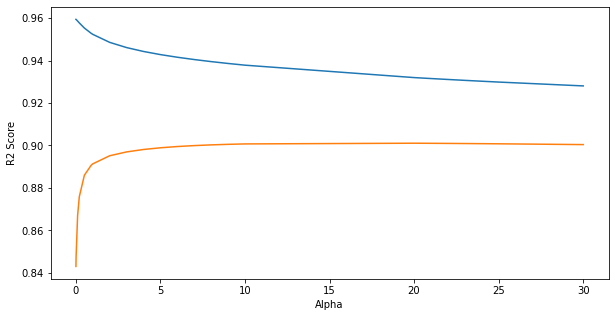

In [202]:
plt.figure(figsize=(10,5))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

On the basis of the graph let's create a model

In [203]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [204]:
ridge = Ridge(alpha = 20.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9301411086093355
0.9019489952746458


In [205]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [206]:
ridge_coef.sort_values(by='Coef',ascending=False).head(15)

,Feaure,Coef
0,LotFrontage,11.767861
3,OverallCond,0.080067
70,Neighborhood_Edwards,0.063929
127,Exterior1st_CBlock,0.058440
80,Neighborhood_OldTown,0.055003
13,BsmtFullBath,0.049832
261,SaleCondition_Partial,0.048798
212,FireplaceQu_Fa,0.048482
98,Condition2_PosA,0.047973
86,Neighborhood_Timber,0.046796


## Lasso Regression

In [207]:
ls = Lasso(alpha =0.01)
ls.fit(X_train,y_train)

y_train_pred = ls.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = ls.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8821427036558263
0.8834949430983521


Let's use GridSearchCV to get the best alpha value.

In [208]:
folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001,0.0005,0.0009,0.001,0.002,0.003,0.004,0.005,0.01]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.0009, 0.001, 0.002, 0.003,
                                   0.004, 0.005, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [209]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.154704,0.061234,0.006396,0.001356,0.0001,{'alpha': 0.0001},0.915158,0.851870,0.901175,0.834311,0.897127,0.879928,0.031166,8,0.951458,0.958442,0.951217,0.956640,0.953691,0.954290,0.002849
1,0.075953,0.015313,0.005996,0.002097,0.0005,{'alpha': 0.0005},0.917506,0.889683,0.929992,0.838233,0.908193,0.896721,0.032065,3,0.936280,0.941385,0.934914,0.942693,0.939885,0.939031,0.002973
2,0.038174,0.004531,0.006397,0.001743,0.0009,{'alpha': 0.0009},0.913975,0.907671,0.931455,0.834490,0.911091,0.899736,0.033638,2,0.928123,0.931160,0.925486,0.936882,0.930382,0.930407,0.003793
3,0.035577,0.002057,0.004797,0.000400,0.0010,{'alpha': 0.001},0.913031,0.910558,0.930971,0.833370,0.911266,0.899839,0.034079,1,0.926575,0.929042,0.923213,0.935855,0.928358,0.928609,0.004147
4,0.027382,0.007442,0.005196,0.001469,0.0020,{'alpha': 0.002},0.902580,0.910395,0.921590,0.823570,0.906900,0.893007,0.035286,4,0.909990,0.908763,0.905509,0.925709,0.909917,0.911977,0.007056
5,0.024184,0.004018,0.005797,0.001599,0.0030,{'alpha': 0.003},0.892842,0.904912,0.915311,0.816845,0.902767,0.886535,0.035569,5,0.899876,0.899319,0.897432,0.917843,0.900616,0.903017,0.007487
6,0.016788,0.000748,0.004797,0.000401,0.0040,{'alpha': 0.004},0.889197,0.903338,0.911975,0.815449,0.898749,0.883742,0.034928,6,0.895467,0.892971,0.891797,0.912983,0.893095,0.897262,0.007950
7,0.017387,0.002059,0.005797,0.002134,0.0050,{'alpha': 0.005},0.887052,0.903286,0.909967,0.814510,0.896899,0.882343,0.034748,7,0.892588,0.889576,0.888209,0.909999,0.889566,0.893988,0.008133
8,0.015390,0.001854,0.004996,0.000632,0.0100,{'alpha': 0.01},0.878727,0.900456,0.901684,0.806655,0.887585,0.875021,0.035223,9,0.883106,0.878198,0.877937,0.899745,0.878910,0.883579,0.008296


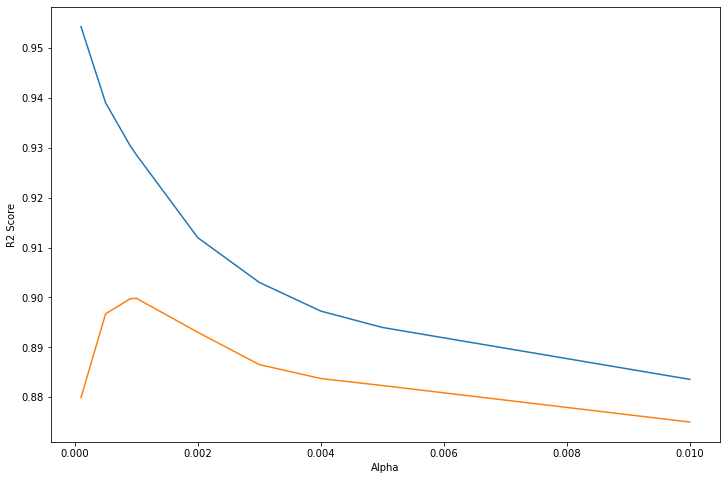

In [210]:
plt.figure(figsize=(12,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [211]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [212]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9242007993415173
0.9049260443486132


In [213]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [214]:
lasso_coef.sort_values(by='Coef',ascending=False).head(15)

,Featuere,Coef
0,LotFrontage,11.806608
13,BsmtFullBath,0.101250
3,OverallCond,0.090271
70,Neighborhood_Edwards,0.086894
127,Exterior1st_CBlock,0.080901
255,SaleType_Oth,0.065933
80,Neighborhood_OldTown,0.065032
49,MSZoning_RM,0.064023
212,FireplaceQu_Fa,0.055850
47,MSZoning_RH,0.052266


After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am going to consider lasso as my final model.

# Final Model

In [215]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9242007993415173
0.9049260443486132


In [216]:
from sklearn.metrics import mean_squared_error

# Mean squared error for Lasso regression


mean_squared_error(y_test, lasso.predict(X_test))

0.015188515572464565

In [217]:
# Mean squared error for Ridge regression

mean_squared_error(y_test, ridge.predict(X_test))

0.01566411328910683

#### After comparing both the models we can see that the below Features are best explaining the DataSet

1. LotFrontage -  Linear feet of street connected to property

2. BsmtFullBath - Basement full bathrooms

3. OverallCond - Rates the overall condition of the house

4. Neighborhood_Edwards - Edwards (Physical locations within Ames city limits)

5. Exterior1st_CBlock - Exterior covering on house- Cinder Block

6. Neighborhood_OldTown - Old Town (Physical locations within Ames city limits)

7. FireplaceQu_Fa - Fireplace quality -Fair - Prefabricated Fireplace in basement

8. SaleCondition_Partial - Condition of sale - Home was not completed when last assessed (associated with New Homes)

9. MasVnrArea - Masonry veneer area in square feet


#### Alpha value for Ridge Regression - 20.0

#### Alpha value for Lasso Regression - 0.001